In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style='white',palette='muted')

from matplotlib.ticker import StrMethodFormatter

from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [91]:
df = pd.read_csv('C:\capstone\mongo\output.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7368\601828809.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('C:\capstone\mongo\output.csv')


## Preprocessing

In [92]:
df.columns
df2=df

In [93]:
df.dtypes

Unnamed: 0                                 int64
result.name.first                         object
result.name.last                          object
result.username                           object
result.password                           object
result.phoneNumber                        object
result.location.street                    object
result.location.city                      object
result.location.state                     object
result.location.country                   object
result.location.zip                       object
result.location.coordinates.latitude     float64
result.location.coordinates.longitude    float64
result.job                                object
result.salary                            float64
result.objectId                           object
id                                         int64
dtype: object

In [94]:
# renaming columns
df2.columns = df2.columns.str.replace('result.', '')
df2.columns = df2.columns.str.replace('.', '_')


In [95]:
# count
df2.shape[0]

1200

In [96]:
# checking for duplicates
duplicate = df2[df2.duplicated(['name_first','name_last'])]
duplicate.head()


,Unnamed: 0,name_first,name_last,username,password,phoneNumber,location_street,location_city,location_state,location_country,location_zip,location_coordinates_latitude,location_coordinates_longitude,job,salary,objectId,id
782,182,Napoleon,Parisian,Napoleon-Parisian,1RPuC6xASl8MTXd,401.300.0279 x9157,2041 McLaughlin Manor,Madison,North Carolina,Democratic Republic of the Congo,14157,22.3259,-94.8501,Corporate Integration Technician,251.0,66916acdc5d023f89ccba720,782


In [97]:
# dropping duplicates
df3=df2.drop_duplicates(subset=['name_first','name_last'])
df3.shape[0]

1199

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7368\595434434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['salary'] = df3['salary'].apply(lambda x: x*100)


<Axes: >

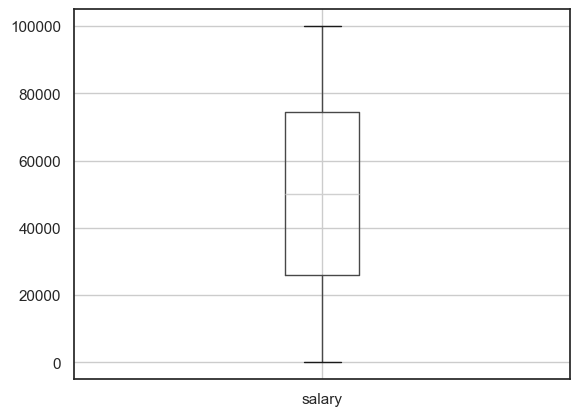

In [98]:
#checking salary distribution
df3['salary'] = df3['salary'].apply(lambda x: x*100)
df3.boxplot(column =['salary'], grid = True)

In [99]:
# checking for nulls
print(df3.isnull().sum())

Unnamed: 0                        0
name_first                        0
name_last                         0
username                          0
password                          0
phoneNumber                       0
location_street                   0
location_city                     0
location_state                    0
location_country                  0
location_zip                      0
location_coordinates_latitude     0
location_coordinates_longitude    0
job                               0
salary                            0
objectId                          0
id                                0
dtype: int64


In [100]:
df3.columns

Index(['Unnamed: 0', 'name_first', 'name_last', 'username', 'password',
       'phoneNumber', 'location_street', 'location_city', 'location_state',
       'location_country', 'location_zip', 'location_coordinates_latitude',
       'location_coordinates_longitude', 'job', 'salary', 'objectId', 'id'],
      dtype='object')

In [101]:
features_df=df3[['name_first','name_last','phoneNumber','location_state','job','salary']]
features_df.head(3)

,name_first,name_last,phoneNumber,location_state,job,salary
0,Gabriella,Goodwin,642-873-2224 x227,Michigan,Senior Usability Consultant,21700.0
1,Dahlia,Mitchell,424-609-5670,Tennessee,National Response Representative,11400.0
2,Dario,Lakin,695.401.3008 x44210,Minnesota,Legacy Directives Analyst,42100.0


In [102]:
features_df.columns

Index(['name_first', 'name_last', 'phoneNumber', 'location_state', 'job',
       'salary'],
      dtype='object')

## Machine Learning

In [103]:
numeric_features = ['salary']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['name_first','name_last','phoneNumber','location_state','job']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

# X = features_df.drop(columns=['salary'])
# y=features_df['salary']
X=df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [1200, 1199]

In [ ]:



# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
